In [ ]:
!pip install gdelt
import gdelt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

here
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
children_mortality = pd.read_csv('/content/drive/MyDrive/children_mortality_rate.csv')
adult_mortality = pd.read_csv('/content/drive/MyDrive/adult_mortality_rate.csv')
suicide_rates = pd.read_csv('/content/drive/MyDrive/suicide_rates.csv')
poverty = pd.read_csv('/content/drive/MyDrive/poverty.csv')

In [ ]:
children_mortality['Value_Cleaned'] = children_mortality['Value'].str.extract(r'([0-9]+\.[0-9]+)')

# Convert the extracted values to float for numerical operations
children_mortality['Value_Cleaned'] = children_mortality['Value_Cleaned'].astype(float)
children_mortality['Value_Cleaned'] = children_mortality['Value_Cleaned'] * 100

# Select the required columns
filtered_children_mortality = children_mortality[['Value_Cleaned', 'Location', 'Period']]
filtered_children_mortality = filtered_children_mortality.rename(columns={'Value_Cleaned': f'Value_children_mortality'})


In [ ]:
suicide_rates['Value_Cleaned'] = suicide_rates['Value'].str.extract(r'([0-9]+\.[0-9]+)')

# Convert the extracted values to float for numerical operations
suicide_rates['Value_Cleaned'] = suicide_rates['Value_Cleaned'].astype(float)
suicide_rates['Value_Cleaned'] = suicide_rates['Value_Cleaned'] * 100

# Select the required columns
filtered_suicide_rates = suicide_rates[['Value_Cleaned', 'Location', 'Period']]
filtered_suicide_rates = filtered_suicide_rates.rename(columns={'Value_Cleaned': f'Value_suicide_rates'})


In [ ]:
# filtering the columns
filtered_adult_mortality = adult_mortality[['Value', 'Location', 'Period']]
filtered_poverty = poverty[['Value', 'Location', 'Period']]
# Renaming the columns
filtered_adult_mortality = adult_mortality.rename(columns={'Value': 'Value_adult_mortality'})[['Value_adult_mortality', 'Location', 'Period']]
filtered_poverty = poverty.rename(columns={'Value': 'Value_poverty'})[['Value_poverty', 'Location', 'Period']]

In [ ]:
merged_data = filtered_children_mortality.merge(filtered_adult_mortality, on=['Location', 'Period'], how='inner')
merged_data = merged_data.merge(filtered_suicide_rates, on=['Location', 'Period'], how='inner')
merged_data = merged_data.merge(filtered_poverty, on=['Location', 'Period'], how='inner')

In [ ]:
who_data = merged_data.groupby(['Location', 'Period']).sum().reset_index()

In [ ]:
who_data.head()

,Location,Period,Value_children_mortality,Value_adult_mortality,Value_suicide_rates,Value_poverty
0,Afghanistan,2007,15030.0,7353,12960.0,11.61
1,Afghanistan,2013,12240.0,6336,10800.0,21.60
2,Afghanistan,2016,31590.0,19791,32400.0,67.23
3,Albania,2002,16200.0,8235,37260.0,81.27
4,Albania,2005,14580.0,8532,60480.0,83.97


In [ ]:
who_data.isna().sum()

Location                    0
Period                      0
Value_children_mortality    0
Value_adult_mortality       0
Value_suicide_rates         0
Value_poverty               0
dtype: int64

In [ ]:
import gdelt

In [ ]:
gd1 = gdelt.gdelt(version=1)
gkg_results = gd1.Search(['2015 03 15', '2015 04 15'], table='gkg')
gkg_df = pd.DataFrame(gkg_results)

In [ ]:
health_keyword = ['HEALTH_NEWS', 'HEALTH', 'DISEASE_OUTBREAK']
health_df = gkg_df[gkg_df['THEMES'].str.contains('|'.join(health_keyword), case=False, na=False)]
health_df.head()

,DATE,NUMARTS,COUNTS,THEMES,LOCATIONS,PERSONS,ORGANIZATIONS,TONE,CAMEOEVENTIDS,SOURCES,SOURCEURLS
8,20150407,1,NaN,TAX_WORLDMAMMALS;TAX_WORLDMAMMALS_HUMANS;ENV_C...,1#Germany#GM#GM#51#9#GM;1#Afghanistan#AF#AF#33...,konrad adenauer;willy brandt ostpolitik;deutsc...,european economic community;international mone...,"-0.425733207190161,1.89214758751183,2.31788079...",NaN,blogspot.com,http://amedleyofpotpourri.blogspot.com/2015/04...
9,20150407,1,NaN,EDUCATION;MANMADE_DISASTER_IMPLIED;SOC_POINTSO...,"4#Petersburg, Sankt-Peterburg, Russia#RS#RS66#...",roy peter clark;tracy cox;steve coll;sabrina r...,national sexual violence resource center;poynt...,"-3.90286209887251,1.8213356461405,5.7241977450...","423257792,423259159,423259575",yahoo.com,https://ca.news.yahoo.com/rolling-stone-debacl...
17,20150407,1,"KILL#6##4#Rompin, Pahang, Malaysia#MY#MY06#2.8...",SECURITY_SERVICES;TAX_FNCACT;TAX_FNCACT_POLICE...,"4#Kuala Lumpur, Kuala Lumpur, Malaysia#MY#MY14...",bukit aman;kampung pasir baru;jamaluddin jarji...,accident investigation bureau;lenovo,"-3.85964912280702,0.350877192982456,4.21052631...",NaN,themalaysianinsider.com,http://www.themalaysianinsider.com/malaysia/ar...
25,20150407,1,SEIZE#2##1#United States#US#US#38#-97#US;SEIZE...,SEIZE;CRIME_ILLEGAL_DRUGS;DRUG_TRADE;SOC_POINT...,1#United States#US#US#38#-97#US,NaN,united states,"-4.80769230769231,0.961538461538462,5.76923076...",NaN,newstalk.com,http://www.newstalk.com/reader/47.301/44782/0/
28,20150407,2,NaN,KILL;GENERAL_HEALTH;MEDICAL;SOC_POINTSOFINTERE...,"4#Baku, Baki*, Azerbaijan#AJ#AJ09#40.3953#49.8...",kathleen reock ketofsky;ernest c reock jr;jean...,jersey college for women;terms of service;jers...,"-3.97877984084881,1.06100795755968,5.039787798...",NaN,centraljersey.com;centraljersey.com,http://centraljersey.com/articles/2015/04/07/o...


In [ ]:
events_results = gd1.Search(['2015 03 21', '2015 03 23'], coverage=True, table='events')
events_df = pd.DataFrame(events_results)

In [ ]:
# Merge the DataFrames on the specified columns
events_df['GLOBALEVENTID'] = events_df['GLOBALEVENTID'].astype(str)

merged_df = pd.merge(events_df, health_df, left_on='GLOBALEVENTID', right_on='CAMEOEVENTIDS')

In [ ]:
relevant_columns = ['Year','ActionGeo_FullName', 'CAMEOCodeDescription', 'Actor1Name', 'Actor2Name']
gdelt_data = merged_df[relevant_columns]
gdelt_data.head()

,Year,ActionGeo_FullName,CAMEOCodeDescription,Actor1Name,Actor2Name
0,2015,NaN,Engage in negotiation,NaN,POLICE
1,2015,NaN,Make empathetic comment,NaN,PRESIDENT
2,2015,NaN,"Accuse, not specified below",NaN,PRESIDENT
3,2015,India,"Reject, not specified below",NaN,CONSULATE
4,2015,India,"Reject, not specified below",NaN,CONSULATE


In [ ]:
gdelt_data.isna().sum()

Year                       0
ActionGeo_FullName       537
CAMEOCodeDescription       0
Actor1Name               605
Actor2Name              3591
dtype: int64

In [ ]:
gdelt_data = gdelt_data.dropna(subset=['ActionGeo_FullName', 'Actor1Name', 'Actor2Name'])
gdelt_data.isna().sum()

Year                    0
ActionGeo_FullName      0
CAMEOCodeDescription    0
Actor1Name              0
Actor2Name              0
dtype: int64

In [ ]:
final_data = pd.merge(who_data, gdelt_data, left_on=['Location', 'Period'], right_on=['ActionGeo_FullName', 'Year'], how='inner')


In [ ]:
final_data.head()

,Location,Period,Value_children_mortality,Value_adult_mortality,Value_suicide_rates,Value_poverty,Year,ActionGeo_FullName,CAMEOCodeDescription,Actor1Name,Actor2Name
0,Australia,2015,3510.0,5049,107190.0,30.51,2015,Australia,"Disapprove, not specified below",PRIME MINISTER,SENATE
1,Australia,2015,3510.0,5049,107190.0,30.51,2015,Australia,"Appeal, not specified below",BISHOP,AUSTRALIAN
2,Australia,2015,3510.0,5049,107190.0,30.51,2015,Australia,Express intent to meet or negotiate,AUSTRALIA,MITSUBISHI
3,Australia,2015,3510.0,5049,107190.0,30.51,2015,Australia,"Accuse, not specified below",AUSTRALIA,EMPLOYER
4,Australia,2015,3510.0,5049,107190.0,30.51,2015,Australia,"Make statement, not specified below",AUSTRALIA,HUMAN RIGHTS WATCH


In [ ]:
# vrskata megju adult mortality i nastanite vo taa godina

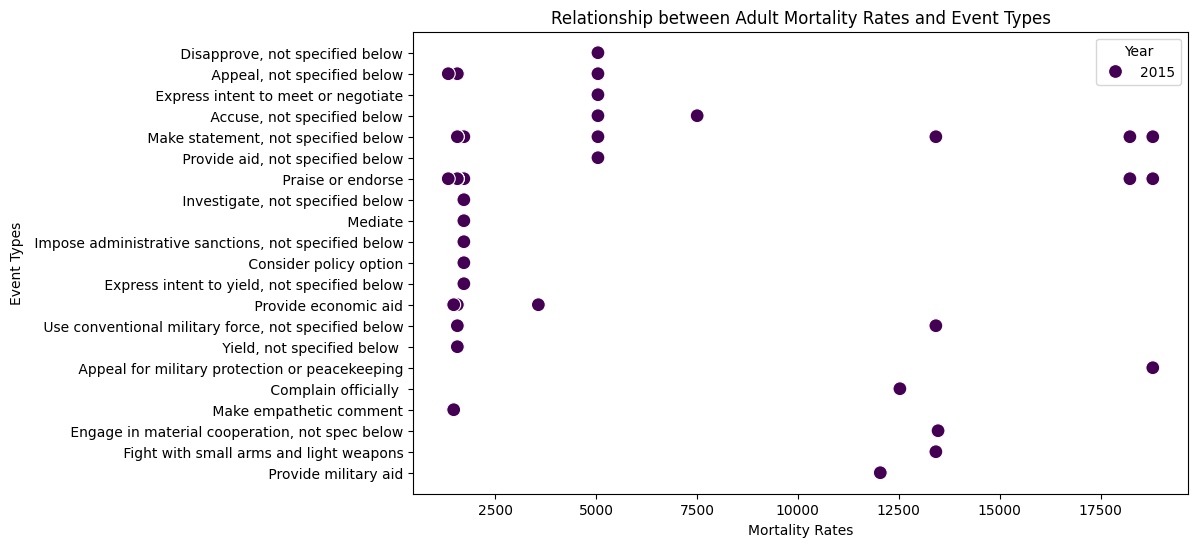

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='Value_adult_mortality', y='CAMEOCodeDescription', hue='Year', palette='viridis', s=100)
plt.title('Relationship between Adult Mortality Rates and Event Types')
plt.xlabel('Mortality Rates')
plt.ylabel('Event Types')
plt.legend(title='Year')
plt.show()

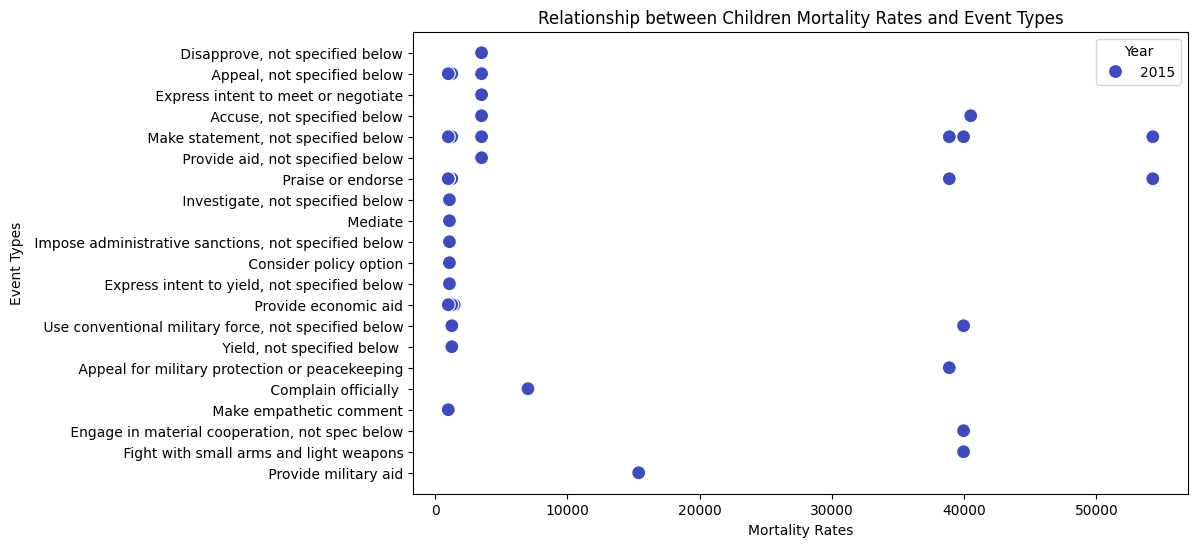

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='Value_children_mortality', y='CAMEOCodeDescription', hue='Year', palette='coolwarm', s=100)
plt.title('Relationship between Children Mortality Rates and Event Types')
plt.xlabel('Mortality Rates')
plt.ylabel('Event Types')
plt.legend(title='Year')
plt.show()

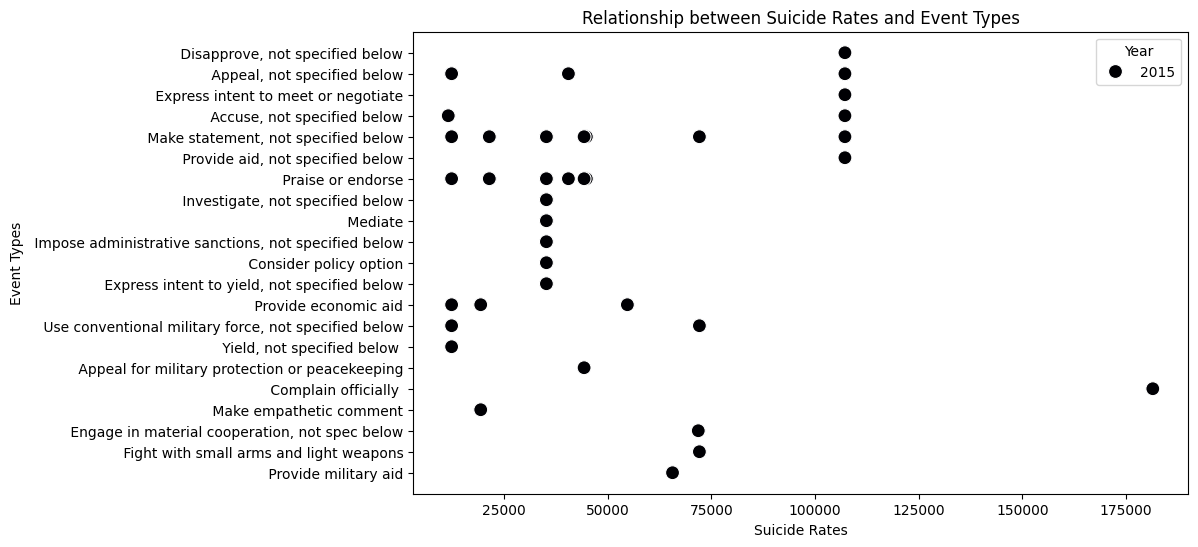

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='Value_suicide_rates', y='CAMEOCodeDescription', hue='Year', palette='magma', s=100)
plt.title('Relationship between Suicide Rates and Event Types')
plt.xlabel('Suicide Rates')
plt.ylabel('Event Types')
plt.legend(title='Year')
plt.show()

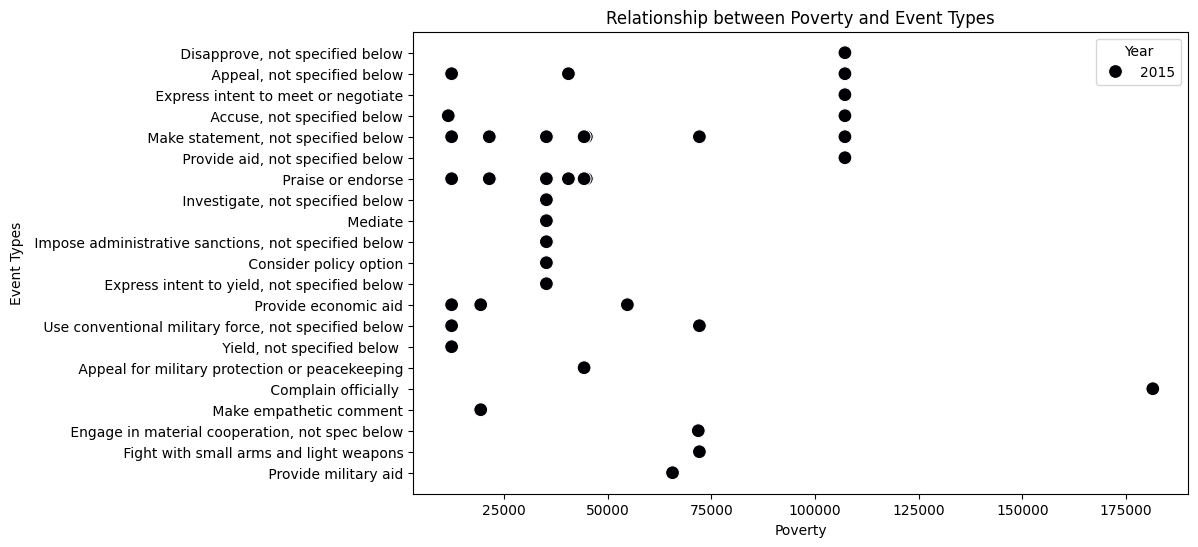

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='Value_suicide_rates', y='CAMEOCodeDescription', hue='Year', palette='inferno', s=100)
plt.title('Relationship between Poverty and Event Types')
plt.xlabel('Poverty')
plt.ylabel('Event Types')
plt.legend(title='Year')
plt.show()